<a href="https://colab.research.google.com/github/SatyaSirishaBolloju/Decision_Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I analyzed the Heart Disease dataset in a project aimed at predicting heart disease using decision tree classifiers. The dataset includes various features like age, alcohol drinking, and smoking. Leveraging Python and Scikit-learn, I constructed two decision tree models with different splitting criteria—Gini Index and Entropy. The Gini Index measures impurity in the data, while Entropy assesses information gain. By training these models on the dataset, I aimed to identify key indicators influencing heart disease. The decision tree classifiers demonstrated the potential for accurate predictions based on the dataset's attributes. This project not only facilitated a practical application of decision tree classification but also contributed to understanding the factors influencing heart health.

# Importing Libraries and Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("heart.csv")

# Exploratory data analysis

In [ ]:
df.shape # view dimensios of dataset

(201803, 18)

In [ ]:
df.head() #view top 5 rows of dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201803 entries, 0 to 201802
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      201803 non-null  object 
 1   BMI               201803 non-null  float64
 2   Smoking           201803 non-null  object 
 3   AlcoholDrinking   201803 non-null  object 
 4   Stroke            201803 non-null  object 
 5   PhysicalHealth    201803 non-null  int64  
 6   MentalHealth      201803 non-null  int64  
 7   DiffWalking       201803 non-null  object 
 8   Sex               201803 non-null  object 
 9   AgeCategory       201803 non-null  object 
 10  Race              201803 non-null  object 
 11  Diabetic          201802 non-null  object 
 12  PhysicalActivity  201802 non-null  object 
 13  GenHealth         201802 non-null  object 
 14  SleepTime         201802 non-null  float64
 15  Asthma            201802 non-null  object 
 16  KidneyDisease     20

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
col_names = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

# Frequency distribution of values in variables
for col in col_names:
    print(df[col].value_counts())

No     184619
Yes     17184
Name: HeartDisease, dtype: int64
26.63    2342
27.46    1790
27.44    1733
24.41    1701
27.12    1604
         ... 
67.49       1
60.69       1
53.73       1
56.83       1
13.83       1
Name: BMI, Length: 3239, dtype: int64
No     117685
Yes     84118
Name: Smoking, dtype: int64
No     187749
Yes     14054
Name: AlcoholDrinking, dtype: int64
No     194187
Yes      7616
Name: Stroke, dtype: int64
0     143484
30     12099
2       9361
1       6616
3       5394
5       4837
10      3396
15      3197
7       2826
4       2774
20      2001
14      1771
6        811
25       737
8        590
21       387
12       385
28       278
29       130
9        117
18       102
27        77
16        75
17        65
13        56
11        55
22        53
24        43
26        41
23        28
19        17
Name: PhysicalHealth, dtype: int64
0     129424
30     10703
2      10580
5       9035
3       6756
10      6661
15      6297
1       5802
7       3517
4       3411
20  

summary of variables



*   There are 18 variables in the dataset. Except "BMI","PhysicalHealth","MentalHealth" and "SleepTime". All the variables are of categorical data type.
*   They are given by 'HeartDisease',
'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', and 'SkinCancer'.
*   'HeartDisease' is the target variable.








In [ ]:
numerical_features=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
df_features=df[numerical_features]

In [ ]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(numerical_features)
df_categorical = df[categorical_features]

In [ ]:
df_categorical.head()

,AgeCategory,AlcoholDrinking,Asthma,Diabetic,DiffWalking,GenHealth,HeartDisease,KidneyDisease,PhysicalActivity,Race,Sex,SkinCancer,Smoking,Stroke
0,55-59,No,Yes,Yes,No,Very good,No,No,Yes,White,Female,Yes,Yes,No
1,80 or older,No,No,No,No,Very good,No,No,Yes,White,Female,No,No,Yes
2,65-69,No,Yes,Yes,No,Fair,No,No,Yes,White,Male,No,Yes,No
3,75-79,No,No,No,No,Good,No,No,No,White,Female,Yes,No,No
4,40-44,No,No,No,Yes,Very good,No,No,Yes,White,Female,No,No,No


In [ ]:
df_categorical.columns

Index(['AgeCategory', 'AlcoholDrinking', 'Asthma', 'Diabetic', 'DiffWalking',
       'GenHealth', 'HeartDisease', 'KidneyDisease', 'PhysicalActivity',
       'Race', 'Sex', 'SkinCancer', 'Smoking', 'Stroke'],
      dtype='object')

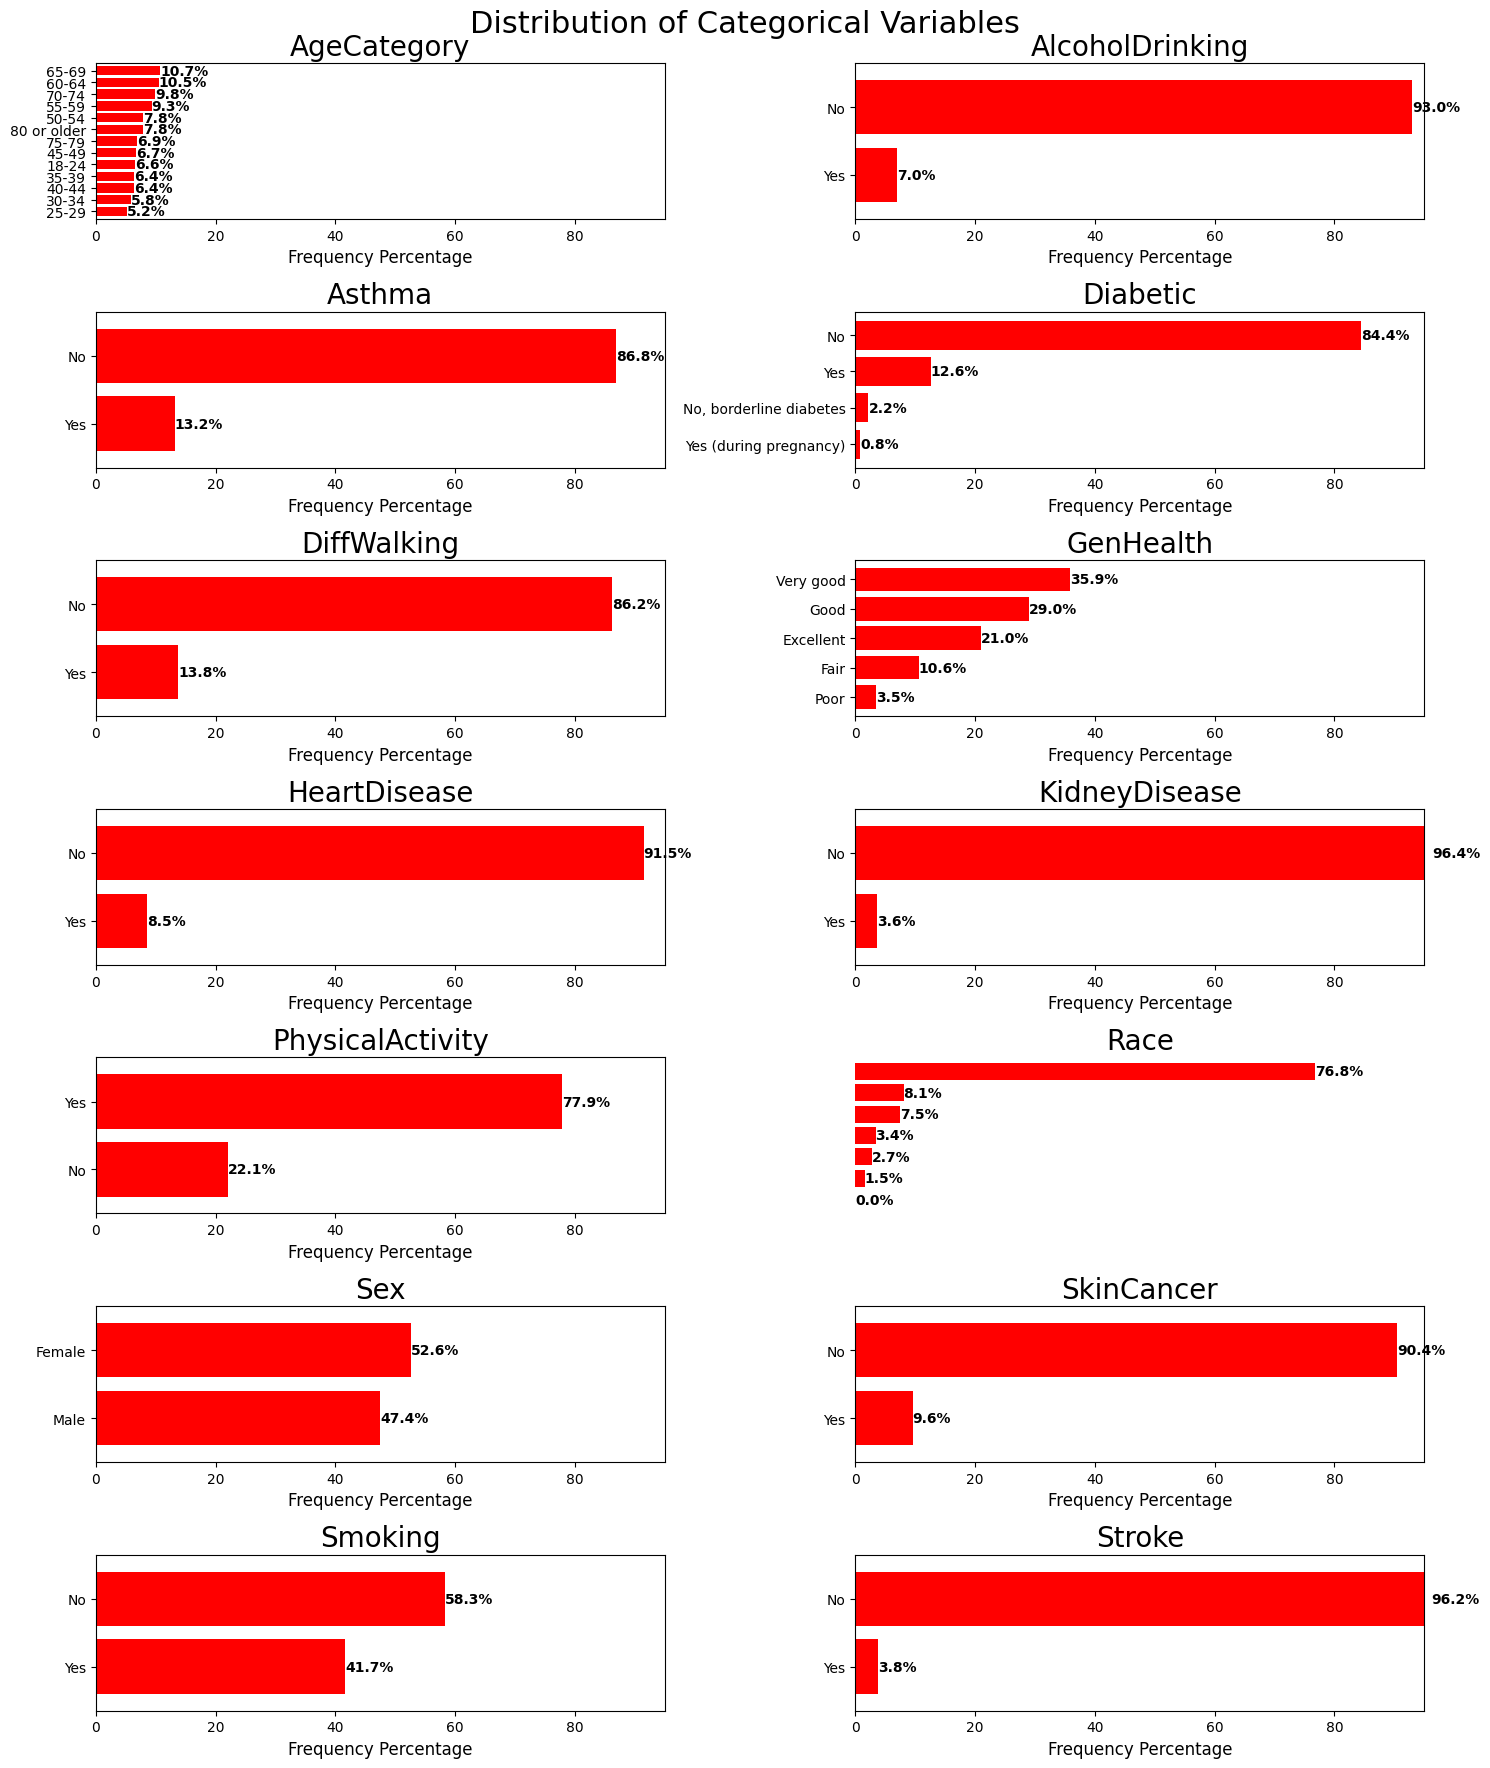

In [ ]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=10, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Exploring "HeartDisease" variable

In [ ]:
df['HeartDisease'].value_counts()

No     184619
Yes     17184
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

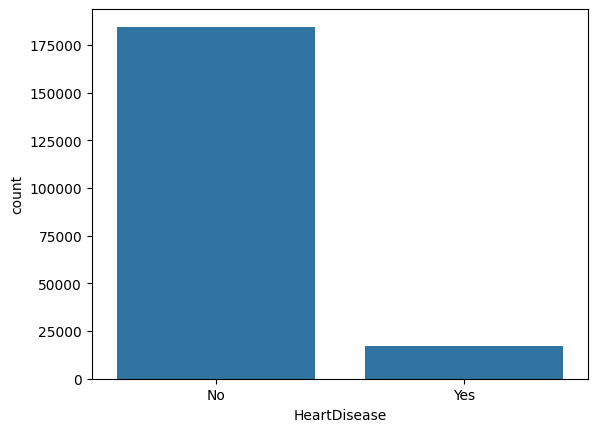

In [ ]:
sns.countplot(x='HeartDisease', data=df)

In [ ]:
df.isnull().sum() #check missing values in variable

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            1
PhysicalActivity    1
GenHealth           1
SleepTime           1
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64

There are no missing values in the dataset.

# Declare feature vector and target variable

In [ ]:
X = df.drop(['HeartDisease','BMI','PhysicalHealth','MentalHealth','SleepTime'], axis=1)
y = df['HeartDisease']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape # check the shape of X_train and X_test

((135208, 13), (66595, 13))

In [ ]:
X_train.dtypes # check data types in X_train

Smoking             object
AlcoholDrinking     object
Stroke              object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
Asthma              object
KidneyDisease       object
SkinCancer          object
dtype: object

In [ ]:
X_train.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
68906,Yes,No,No,No,Male,70-74,White,No,Yes,Very good,No,No,Yes
28978,No,No,No,No,Male,25-29,Black,No,Yes,Good,Yes,No,No
124708,No,No,No,No,Male,65-69,White,No,No,Excellent,No,No,No
31042,Yes,No,No,No,Female,30-34,White,No,No,Good,Yes,No,No
86748,No,No,No,No,Female,25-29,Hispanic,No,No,Excellent,Yes,No,No


In [ ]:
X_train.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
import category_encoders as ce # import category encoders

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
68906,1,1,1,1,1,1,1,1,1,1,1,1,1
28978,2,1,1,1,1,2,2,1,1,2,2,1,2
124708,2,1,1,1,1,3,1,1,2,3,1,1,2
31042,1,1,1,1,2,4,1,1,2,2,2,1,2
86748,2,1,1,1,2,2,3,1,2,3,2,1,2


In [ ]:
X_test.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
125863,2,1,1,1,2,6,1,1,2,1,1,1,2
153965,1,1,2,2,1,12,2,2,2,5,1,1,2
147837,1,1,1,1,1,8,1,1,1,2,2,1,2
85476,1,1,1,2,2,8,1,2,2,4,1,1,2
118004,2,1,1,1,1,10,1,1,1,1,1,1,2


# Decision Tree Classifier with criterion gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9139


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9164


In [ ]:
# Compare the train-set and test-set accuracy
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9164
Test set score: 0.9139


Here, the training-set accuracy score is 0.9155 while the test-set accuracy to be 0.9136 . These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.5, 0.875, 'x[9] <= 3.5\ngini = 0.154\nsamples = 135208\nvalue = [123810, 11398]'),
 Text(0.25, 0.625, 'x[2] <= 1.5\ngini = 0.111\nsamples = 116104\nvalue = [109228, 6876]'),
 Text(0.125, 0.375, 'x[7] <= 1.5\ngini = 0.102\nsamples = 113279\nvalue = [107188, 6091]'),
 Text(0.0625, 0.125, 'gini = 0.084\nsamples = 99737\nvalue = [95372, 4365]'),
 Text(0.1875, 0.125, 'gini = 0.222\nsamples = 13542\nvalue = [11816, 1726]'),
 Text(0.375, 0.375, 'x[7] <= 1.5\ngini = 0.401\nsamples = 2825\nvalue = [2040, 785]'),
 Text(0.3125, 0.125, 'gini = 0.369\nsamples = 2081\nvalue = [1573, 508]'),
 Text(0.4375, 0.125, 'gini = 0.467\nsamples = 744\nvalue = [467, 277]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\ngini = 0.361\nsamples = 19104\nvalue = [14582, 4522]'),
 Text(0.625, 0.375, 'x[5] <= 8.5\ngini = 0.327\nsamples = 16920\nvalue = [13441, 3479]'),
 Text(0.5625, 0.125, 'gini = 0.369\nsamples = 11419\nvalue = [8637, 2782]'),
 Text(0.6875, 0.125, 'gini = 0.221\nsamples = 5501\nvalue = [4804, 697]'),
 Tex

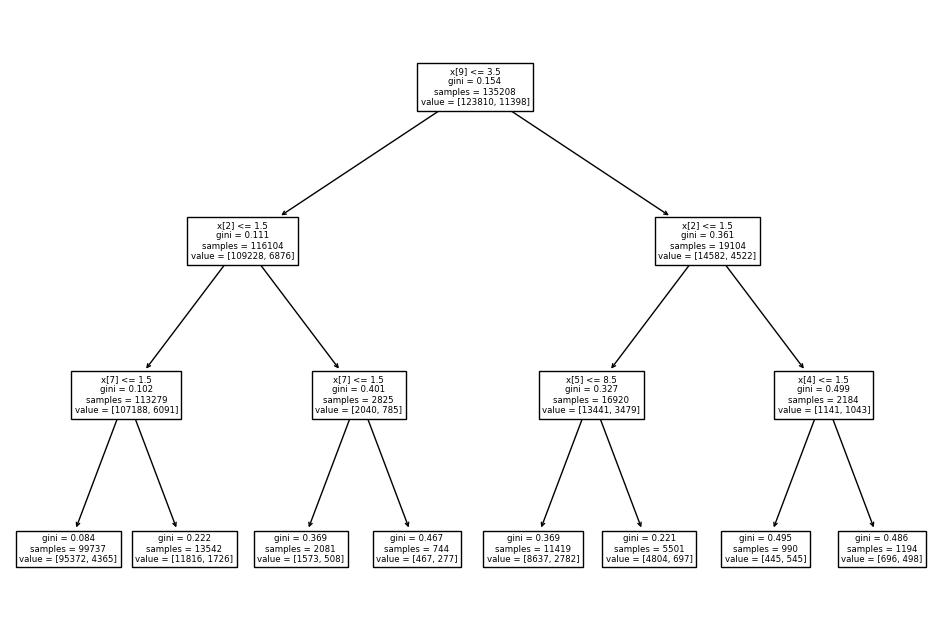

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

## Visualize decision-trees with graphviz

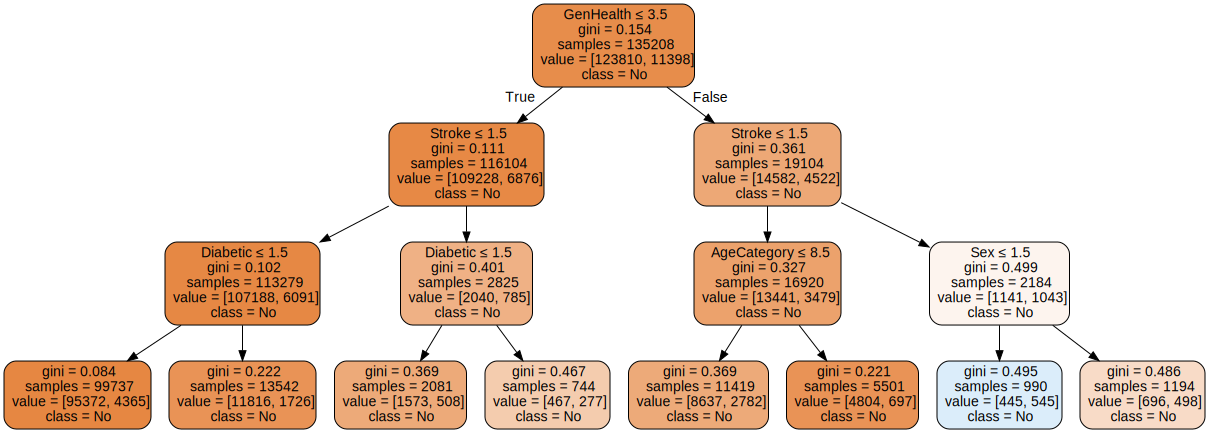

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train.values,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

# Decision Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [ ]:
# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9139


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.9164


In [ ]:
# Compare the train-set and test-set accuracy
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9164
Test set score: 0.9139


Here, the training-set accuracy score is 0.9155 while the test-set accuracy to be 0.9136. These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-trees

[Text(0.5, 0.875, 'x[9] <= 3.5\nentropy = 0.417\nsamples = 135208\nvalue = [123810, 11398]'),
 Text(0.25, 0.625, 'x[5] <= 8.5\nentropy = 0.324\nsamples = 116104\nvalue = [109228, 6876]'),
 Text(0.125, 0.375, 'x[7] <= 1.5\nentropy = 0.402\nsamples = 72217\nvalue = [66439, 5778]'),
 Text(0.0625, 0.125, 'entropy = 0.349\nsamples = 61855\nvalue = [57804, 4051]'),
 Text(0.1875, 0.125, 'entropy = 0.65\nsamples = 10362\nvalue = [8635, 1727]'),
 Text(0.375, 0.375, 'x[2] <= 1.5\nentropy = 0.169\nsamples = 43887\nvalue = [42789, 1098]'),
 Text(0.3125, 0.125, 'entropy = 0.154\nsamples = 43373\nvalue = [42405, 968]'),
 Text(0.4375, 0.125, 'entropy = 0.816\nsamples = 514\nvalue = [384, 130]'),
 Text(0.75, 0.625, 'x[2] <= 1.5\nentropy = 0.79\nsamples = 19104\nvalue = [14582, 4522]'),
 Text(0.625, 0.375, 'x[5] <= 10.5\nentropy = 0.733\nsamples = 16920\nvalue = [13441, 3479]'),
 Text(0.5625, 0.125, 'entropy = 0.772\nsamples = 14561\nvalue = [11263, 3298]'),
 Text(0.6875, 0.125, 'entropy = 0.391\nsampl

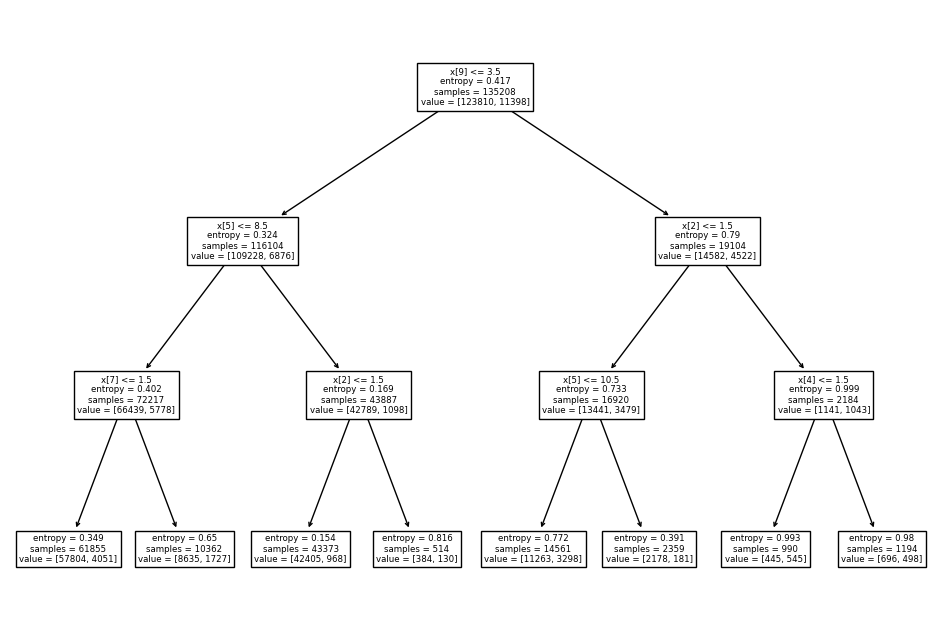

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

## Visualize decision-trees with graphviz

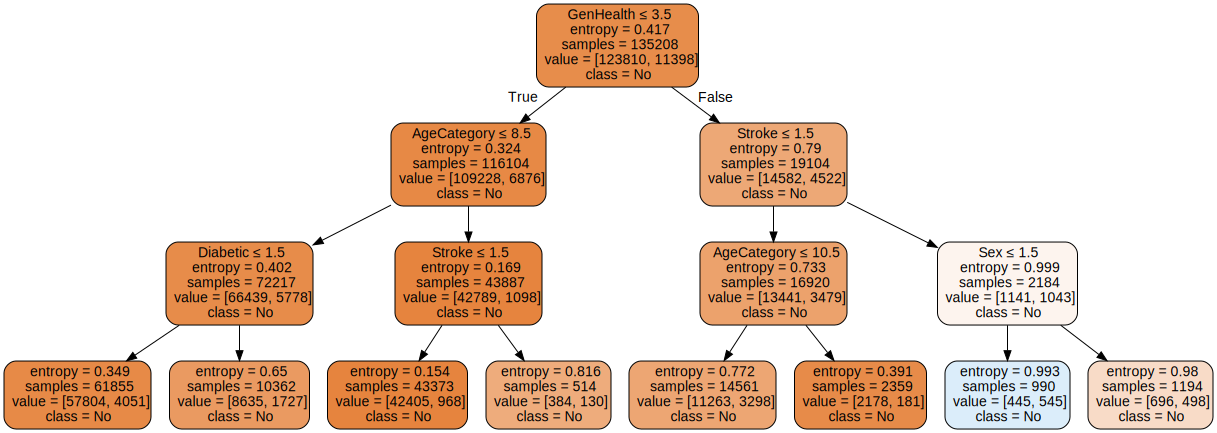

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train.values,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[60584   225]
 [ 5508   278]]


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

          No       0.92      1.00      0.95     60809
         Yes       0.55      0.05      0.09      5786

    accuracy                           0.91     66595
   macro avg       0.73      0.52      0.52     66595
weighted avg       0.89      0.91      0.88     66595



# Results and conclusion

1. In this project, I build a Decision-Tree Classifier model to predict the heat disease. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.9136.
2. In the model with criterion gini index, the training-set accuracy score is 0.9155 while the test-set accuracy to be 0.9136. These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.9155 while the test-set accuracy to be 0.9136.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same.
5. The confusion matrix and classification report yields very good model performance.